In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving data.csv to data (1).csv


# Importationn et traitement du jeu de donnée 

In [3]:
import io 
  
data = pd.read_csv(io.BytesIO(uploaded['data.csv'])) 

In [4]:
data.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.isnull().sum()

num_ligne         0
ID_Client         0
Nom               0
Score_Credit      0
Pays              0
Sex               0
Age               0
Tenure            0
Balance           0
Num_Produit       0
il_a_CrCard       0
Membre_actif      0
Salaire_estime    0
Exited            0
dtype: int64

L'objectif est ici de predire la derniere colonne, qui sera donc notre target. On peut donc l'isoler et commencer a traiter les différentes features. 
Il n'y a aucun NaN dans nos données donc pas de traitement a faire de ce coté.


In [6]:
y=data.iloc[:,-1].values
print("Il y a {} valeurs uniques".format(len(np.unique(y))))

Il y a 2 valeurs uniques


On pourra utiliser un classificateur binaire étant donnée que cette derniere ne prend que 2 valeurs. 
## Traitement des données non numériques

On va commencer par supprimer les colonnes 'num_ligne' et 'id_client' et 'Nom' qui n'ont pas d'impact ur la satisfaction de ce dernier.

In [7]:
data=data.drop('num_ligne',axis=1)
data=data.drop('ID_Client',axis=1)
data=data.drop('Nom',axis=1)
data.head()

,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data=pd.get_dummies(data)
data.head()

,Score_Credit,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited,Pays_France,Pays_Germany,Pays_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


On sépare maintenant notre jeu de donnée :


In [9]:
X=data.drop('Exited',axis=1).values
X.shape

(10000, 12)

On va maintenant séparer notre jeu de donnée en base de test et d'apprentissage :
 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Test de l'apprentissage avec différentes méthodes
## Regression logistique :

In [11]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

Nous avons une accuracy de : 0.7805


On a ici une accuracy de 0.79 sur le jeu de test
## SVM :

In [12]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

Nous avons une accuracy de : 0.7865


On a ici une accuracy de 0.80, un valeur un peu meilleure. On va maintenant essayer avec un réseau de neuronnes.
## Tensorflow 

In [13]:
import tensorflow as tf 
from sklearn.preprocessing import StandardScaler
X.shape
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:
for i in range(8):
  X_train=np.concatenate((X_train,X_train),axis=0)
  y_train=np.concatenate((y_train,y_train),axis=0)

Epoch 1/5
16384/16384 [==============================] - 48s 3ms/step - loss: 0.3115 - accuracy: 0.8713 - val_loss: 0.2230 - val_accuracy: 0.9087
Epoch 2/5
16384/16384 [==============================] - 46s 3ms/step - loss: 0.2117 - accuracy: 0.9122 - val_loss: 0.1772 - val_accuracy: 0.9246
Epoch 3/5
16384/16384 [==============================] - 46s 3ms/step - loss: 0.1652 - accuracy: 0.9320 - val_loss: 0.1362 - val_accuracy: 0.9464
Epoch 4/5
16384/16384 [==============================] - 46s 3ms/step - loss: 0.1304 - accuracy: 0.9476 - val_loss: 0.1061 - val_accuracy: 0.9595
Epoch 5/5
16384/16384 [==============================] - 46s 3ms/step - loss: 0.1062 - accuracy: 0.9588 - val_loss: 0.0999 - val_accuracy: 0.9629
Nous avons une accuracy de : 0.798


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


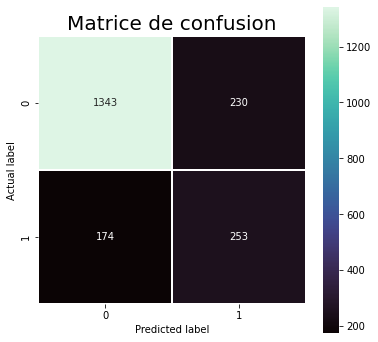

In [15]:
import seaborn as sns
model = tf.keras.Sequential([
    tf.keras.layers.Dense(36,activation='relu',input_shape=(12,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)  

history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=100,
                    validation_split=0.2
                    ) 


y_pred=model.predict_classes(X_test)
score=metrics.accuracy_score(y_test,y_pred)
print("Nous avons une accuracy de : {}".format(score))

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [15]:
Notre réseau de neurone est donc plus efficaces pour traiter cette classification que les méthodes classiques.